In [ ]:
!wget 'https://sfi-essential.s3.eu-west-1.amazonaws.com/gurobi11.0.0_linux64.tar.gz'
!wget 'https://sfi-essential.s3.eu-west-1.amazonaws.com/DCC.net.xml'

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 64.6 MB/s eta 0:00:00


In [ ]:
!tar xvfz gurobi11.0.0_linux64.tar.gz

import os

# Set the GUROBI_HOME environment variable

os.environ['GUROBI_HOME'] = "/content/gurobi1100/linux64"

# Update the PATH environment variable
os.environ['PATH'] = f"{os.environ['PATH']}:{os.environ['GUROBI_HOME']}/bin"

os.environ['GRB_LICENSE_FILE'] = '/content/gurobi.lic'

# Set the LD_LIBRARY_PATH environment variable
os.environ['LD_LIBRARY_PATH'] = f"{os.environ['GUROBI_HOME']}/lib"

In [ ]:
import pulp
#print(pulp.listSolvers())

print(pulp.listSolvers(onlyAvailable = True))

['GUROBI_CMD', 'PULP_CBC_CMD']


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# create a directed graph
#def create_graph_from_net_xml(file_path):
#    tree = ET.parse(file_path)
#    root = tree.getroot()
#    G = nx.DiGraph()
#    for connection in root.findall('.//connection'):
#        from_node = connection.get('from')
#        to_node = connection.get('to')
#        G.add_edge(from_node, to_node)
#    return G

# create a directed graph
def create_graph_from_net_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    G = nx.DiGraph()

    for connection in root.findall('.//connection'):
        from_node = connection.get('from')
        to_node = connection.get('to')

        # Function to check if a node starts with a number or negative sign
        def is_numeric_node(node):
            return node.startswith('-') or node[0].isdigit()

        # Exclude nodes that do not start with a number or negative sign
        if is_numeric_node(from_node) and is_numeric_node(to_node):
            G.add_edge(from_node, to_node)

    return G

#def create_graph_from_net_xml(file_path):
#    tree = ET.parse(file_path)
#    root = tree.getroot()
#    G = nx.DiGraph()
#    for connection in root.findall('.//connection'):
#        from_node = connection.get('from')
#        to_node = connection.get('to')

#        # Exclude nodes that start with a colon
#        if not (from_node.startswith(':') or to_node.startswith(':')):
#            G.add_edge(from_node, to_node)
#    return G

# visualize the graph
def visualize_graph(G):
    plt.figure(figsize=(12, 8))  # Set the figure size for the plot
    nx.draw(G, with_labels=True, node_size=700, node_color="lightblue", font_size=8)
    plt.title("Graph Visualization")
    plt.show()

# Check if the graph is strongly connected
def check_strongly_connected(G):
    return nx.is_strongly_connected(G)

In [ ]:
# Main execution
file_path = "/content/DCC.net.xml"  # use DCC as an example here
graph = create_graph_from_net_xml(file_path)

# Display basic information
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
(num_nodes, num_edges)

(6596, 12360)

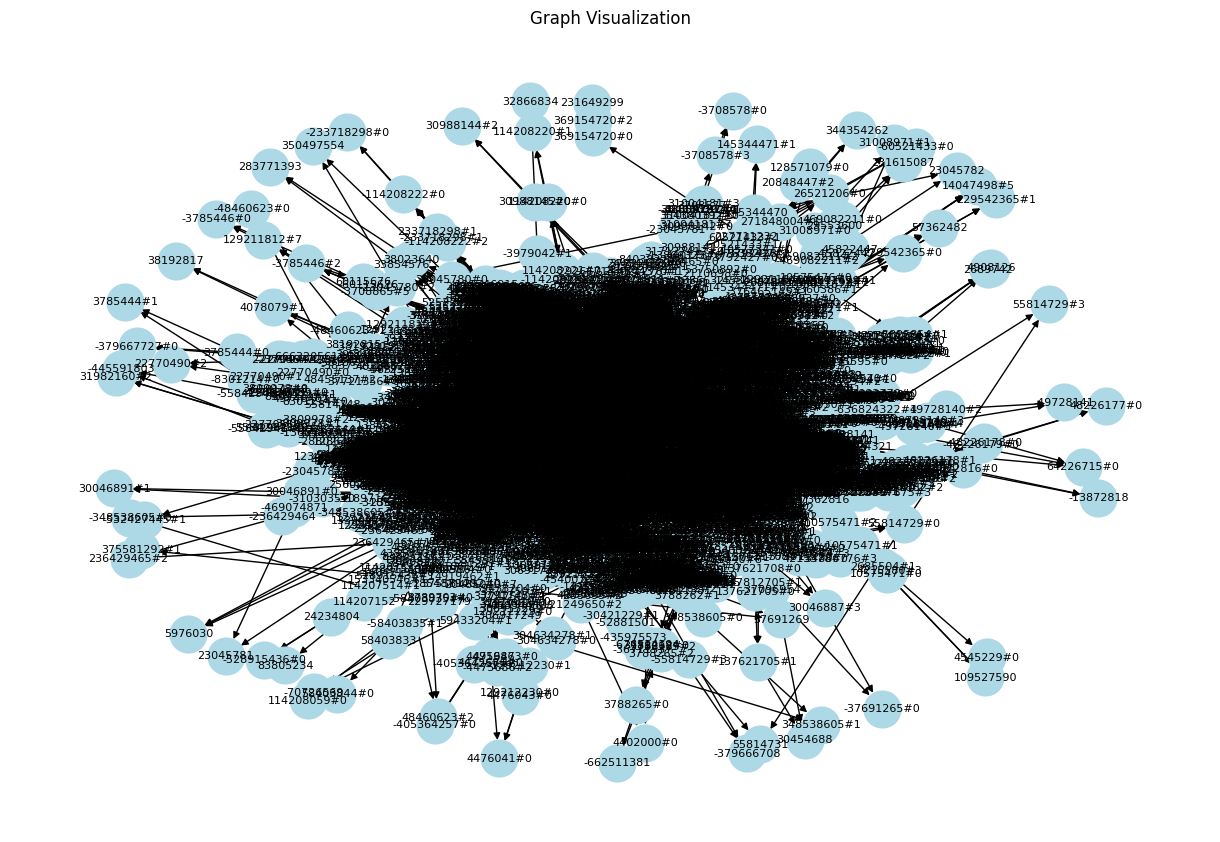

In [ ]:
visualize_graph(graph)

In [ ]:
graph.edges()

In [ ]:
graph.nodes()

In [ ]:
is_connected = check_strongly_connected(graph)

print(f"The graph is {'strongly connected' if is_connected else 'not strongly connected'}.")

The graph is not strongly connected.


In [ ]:
# remapping the IDs
import networkx as nx
import xml.etree.ElementTree as ET

# Function to parse the .net.xml file and create a directed graph
def create_graph_from_net_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    G = nx.DiGraph()

    for connection in root.findall('.//connection'):
        from_node = connection.get('from')
        to_node = connection.get('to')

        # Check if a node starts with a number or negative sign
        def is_numeric_node(node):
            return node.startswith('-') or node[0].isdigit()

        # Exclude nodes that do not start with a number or negative sign
        if is_numeric_node(from_node) and is_numeric_node(to_node):
            G.add_edge(from_node, to_node)

    return G

# Function to relabel the nodes of the graph starting from 1
def relabel_graph_nodes(G):
    mapping = {node: new_name for new_name, node in enumerate(G.nodes(), start=1)}
    G_renamed = nx.relabel_nodes(G, mapping)
    return G_renamed

# Function to create a node mapping from old IDs to new IDs starting from 1
def create_node_mapping(G):
    mapping = {node: new_name for new_name, node in enumerate(G.nodes(), start=1)}
    return mapping

# Path to your .net.xml file
file_path = "/content/DCC.net.xml"

# Create and relabel the graph
graph = create_graph_from_net_xml(file_path)
graph_renamed = relabel_graph_nodes(graph)

# Generate the node mapping
node_mapping = create_node_mapping(graph)

# Displaying the changed mappings
for old_id, new_id in list(node_mapping.items()):
    print(f"Old ID {old_id} maps to New ID {new_id}")

In [ ]:
#graph.nodes()

In [ ]:
#graph.edges()

OutEdgeView([('-1', '3'), ('-1', '-12'), ('-1', '2'), ('-1', '1'), ('3', '-3'), ('-12', '13'), ('-12', '-18'), ('-12', '12'), ('2', '46'), ('2', '47'), ('1', '16'), ('1', '-1'), ('-11', '11'), ('11', '-11'), ('13', '11'), ('-18', '17'), ('-18', '18'), ('12', '2'), ('12', '1'), ('12', '3'), ('12', '-12'), ('-16', '-1'), ('18', '12'), ('18', '13'), ('18', '-18'), ('-19', '-33'), ('-19', '-40'), ('-19', '19'), ('-33', '32'), ('-33', '33'), ('-40', '40'), ('19', '-19'), ('-24', '20'), ('-24', '22'), ('-24', '24'), ('20', '15'), ('22', '36'), ('24', '-24'), ('-3', '-12'), ('-3', '2'), ('-3', '1'), ('-3', '3'), ('32', '31'), ('32', '-53'), ('33', '-40'), ('33', '19'), ('33', '-33'), ('-38', '38'), ('38', '39'), ('38', '-38'), ('40', '19'), ('40', '-33'), ('40', '-40'), ('-44', '-47'), ('-44', '45'), ('-44', '44'), ('-47', '46'), ('-47', '47'), ('45', '-45'), ('44', '-44'), ('-45', '44'), ('-45', '-47'), ('-45', '45'), ('46', '35'), ('47', '45'), ('47', '44'), ('47', '-47'), ('-48', '49'), ('

In [ ]:
#graph_renamed.nodes()

In [ ]:
#graph_renamed.edges()

In [ ]:
#G = graph_renamed

In [ ]:
#!pip install pulp

In [ ]:
# for directed graph

import pulp
import random
import networkx as nx
import matplotlib.pyplot as plt

G = graph_renamed

# Number of nodes and station types
station_types = ['eb', 'es', 'ec', 'walk']

# Define node stations: all nodes have all station types
node_stations = {i: station_types for i in range(1, num_nodes + 1)}

# Probability of a node having no preferred station type (as a percentage)
no_preference_probability = 30  # Example: 30%

# Define preferred station types for each node
preferred_station = {}
for i in range(1, num_nodes + 1):
    if random.randint(1, 100) <= no_preference_probability:
        # With no_preference_probability chance, set no preference ['']
        preferred_station[i] = ['']
    else:
        # Otherwise, randomly decide the number of preferred types
        num_preferred = random.randint(1, len(station_types) - 1)  # Exclude 'walk' only option
        preferred_types = [st for st in station_types if st != 'walk']
        preferred_station[i] = random.sample(preferred_types, num_preferred)
        # Ensure 'walk' is included if any of 'ec', 'eb', or 'es' are present
        if 'walk' not in preferred_station[i]:
            preferred_station[i].append('walk')


# Define station change costs
M = 1e6  # Large cost for prohibitive changes

costs = {}
for i, j in G.edges():
    for s in set(node_stations[i]).intersection(node_stations[j]):
        costs[i, j, s] = random.randint(5, 20)

station_changes = {(i, s1, s2): pulp.LpVariable(f"station_change_{i}_{s1}_{s2}", 0, 1, pulp.LpBinary)
                   for i in range(1, num_nodes + 1)
                   for s1 in preferred_station[i]
                   for s2 in preferred_station[i] if s1 != s2}

station_change_costs = {}
for i in range(1, num_nodes + 1):
  if len(preferred_station[i]) > 1:
    for s1 in preferred_station[i]:
        for s2 in preferred_station[i]:
            if s1 != s2:
              station_change_costs[i, s1, s2] = 0.1
            else:
              # High cost for non-preferred changes
              station_change_costs[i, s1, s2] = M

In [ ]:
preferred_station

In [ ]:
graph.nodes()

In [ ]:
# check if there's a feasible path between starting point A and destination point B, if so, proceed to the next optimization step

def check_path_existence(G, node_start, node_end):
    return nx.has_path(G, node_start, node_end)

# Example
old_start_id = '3789374#3'
old_end_id = '41592115'

node_start = node_mapping[old_start_id]
node_end = node_mapping[old_end_id]

# Check if a path exists between node_start and node_end
path_exists = check_path_existence(G, node_start, node_end)

print(f"A path {'exists' if path_exists else 'does not exist'} between {old_start_id} and {old_end_id}.")

A path exists between 3789374#3 and 41592115.


In [ ]:
# Optimization starts here.

# Specify start and end conditions
start_node, start_station = node_start, 'walk'
end_node, end_station = node_end, 'walk'

max_station_changes = 2  # Example: maximum 20 station changes allowed

# Create a MILP problem
prob = pulp.LpProblem("Minimize_Traversal_Cost", pulp.LpMinimize)

# Decision variables for paths between different nodes and station changes
paths = {(i, j, s): pulp.LpVariable(f"path_{i}_{j}_{s}", 0, 1, pulp.LpBinary)
         for i, j in G.edges()
         for s in set(node_stations[i]).intersection(node_stations[j])}


# Objective Function
prob += pulp.lpSum([paths[i, j, s] * costs[i, j, s] for i, j, s in paths]) + \
        pulp.lpSum([station_changes[i, s1, s2] * station_change_costs[i, s1, s2] for i, s1, s2 in station_changes])


# Constraints

for i in range(1, num_nodes + 1):
    for s in station_types:
        if s in node_stations[i]:
            incoming_flow = pulp.lpSum([paths[j, i, s] for j in G.predecessors(i) if (j, i, s) in paths])
            outgoing_flow = pulp.lpSum([paths[i, j, s] for j in G.successors(i) if (i, j, s) in paths])

            incoming_station_changes = pulp.lpSum([station_changes[i, s2, s] for s2 in node_stations[i] if (i, s2, s) in station_changes])
            outgoing_station_changes = pulp.lpSum([station_changes[i, s, s2] for s2 in node_stations[i] if (i, s, s2) in station_changes])

            incoming_flow += incoming_station_changes
            outgoing_flow += outgoing_station_changes

            if i == start_node and s == start_station:
                prob += outgoing_flow == 1
                prob += incoming_flow == 0
            elif i == end_node and s == end_station:
                prob += incoming_flow == 1
                prob += outgoing_flow == 0
            else:
                prob += incoming_flow == outgoing_flow

# Constraint for maximum number of station changes
prob += pulp.lpSum(station_changes.values()) <= max_station_changes, "MaxStationChanges"

# Solve the problem

import time

# Start the timer
start_time = time.time()

#prob.solve()
#prob.solve(pulp.PULP_CBC_CMD(threads=2))
prob.solve(pulp.GUROBI_CMD(msg=True))

# Stop the timer
end_time = time.time()

# Print the execution time
print("Execution time: {:.2f} seconds".format(end_time - start_time))

def get_old_id_for_new(node_mapping, new_id):
    # Reverse the mapping: new IDs as keys, old IDs as values
    reversed_mapping = {new: old for old, new in node_mapping.items()}

    # Look up the new ID in the reversed mapping
    return reversed_mapping.get(new_id, None)  # Returns None if new_id is not found


# Output results
#if pulp.LpStatus[prob.status] == 'Optimal':
#    print("Total Cost: ", pulp.value(prob.objective))
#    for i, j, s in paths:
#        if pulp.value(paths[i, j, s]) == 1:
#            print(f"Path from {get_old_id_for_new(node_mapping, i)} to {get_old_id_for_new(node_mapping, j)} with station {s} selected. Cost: {costs[i, j, s]}")
#    for i, s1, s2 in station_changes:
#        if pulp.value(station_changes[i, s1, s2]) == 1:
#            print(f"Station change at node {get_old_id_for_new(node_mapping, i)} from {s1} to {s2}. Cost: {station_change_costs[i, s1, s2]}")
#else:
#    print("No optimal solution found.")



# Output results
if pulp.LpStatus[prob.status] == 'Optimal':
    print("Total Cost: ", pulp.value(prob.objective))

    # Start from the initial node and mode
    current_node, current_mode = start_node, start_station

    # Initialize a list to store the path sequence with costs
    path_sequence = []

    # Initialize a counter for the number of station changes
    station_change_count = 0

    # Track whether the destination has been reached
    destination_reached = False

    # Iterate until the destination is reached
    while not destination_reached:
        # Find the next step in the path
        next_step_found = False
        for i, j, s in paths:
            if i == current_node and s == current_mode and pulp.value(paths[i, j, s]) == 1:
                # Add the current step and its cost to the path sequence
                path_cost = costs[i, j, s]
                path_sequence.append((get_old_id_for_new(node_mapping, i), get_old_id_for_new(node_mapping, j), s, path_cost))
                current_node = j
                next_step_found = True
                break

        # Check if mode change occurs at the current node
        for i, s1, s2 in station_changes:
            if i == current_node and s1 == current_mode and pulp.value(station_changes[i, s1, s2]) == 1:
                # Add the mode change and its cost to the path sequence
                mode_change_cost = station_change_costs[i, s1, s2]
                path_sequence.append((get_old_id_for_new(node_mapping, i), s1, s2, mode_change_cost))
                current_mode = s2
                station_change_count += 1
                next_step_found = True

        # Check if the destination is reached
        if current_node == end_node and current_mode == end_station:
            destination_reached = True
        elif not next_step_found:
            print("Destination not reached. Path may be incomplete.")
            break

    # Print the path sequence with costs and the number of station changes
    print("Optimal Path Sequence with Costs:", path_sequence)
    print("Total Number of Station Changes:", station_change_count)

else:
    print("No optimal solution found.")


Execution time: 3.62 seconds
Total Cost:  208.2
Optimal Path Sequence with Costs: [('3789374#3', '-6273612#5', 'walk', 9), ('-6273612#5', '35060880', 'walk', 7), ('35060880', '135582840#0', 'walk', 5), ('135582840#0', '52321641#2', 'walk', 8), ('52321641#2', '52321641#3', 'walk', 19), ('52321641#3', '52321641#4', 'walk', 11), ('52321641#4', '317027067', 'walk', 5), ('317027067', '4396159#0', 'walk', 5), ('4396159#0', '4396159#3', 'walk', 15), ('4396159#3', '360319695#0', 'walk', 6), ('360319695#0', '4396161#0', 'walk', 13), ('4396161#0', 'walk', 'es', 0.1), ('4396161#0', '-150800558#2', 'es', 7), ('-150800558#2', '24450825#0', 'es', 7), ('24450825#0', '24450825#1', 'es', 11), ('24450825#1', '-29333273#2', 'es', 5), ('-29333273#2', '-29333277', 'es', 8), ('-29333277', 'es', 'walk', 0.1), ('-29333277', '44069390#3', 'walk', 5), ('44069390#3', '41592113#1', 'walk', 16), ('41592113#1', '376394520#1', 'walk', 18), ('376394520#1', '41592114', 'walk', 19), ('41592114', '41592115', 'walk', 9)]

In [ ]:
# Output results
#if pulp.LpStatus[prob.status] == 'Optimal':
#    print("Total Cost: ", pulp.value(prob.objective))
#    for i, j, s in paths:
#        if pulp.value(paths[i, j, s]) == 1:
#            print(f"Path from {get_old_id_for_new(node_mapping, i)} to {get_old_id_for_new(node_mapping, j)} with station {s} selected. Cost: {costs[i, j, s]}")
#    for i, s1, s2 in station_changes:
#        if pulp.value(station_changes[i, s1, s2]) == 1:
#            print(f"Station change at node {get_old_id_for_new(node_mapping, i)} from {s1} to {s2}. Cost: {station_change_costs[i, s1, s2]}")
#else:
#    print("No optimal solution found.")

In [ ]:
#!cat /proc/cpuinfo | grep "cpu cores" | uniq

cpu cores	: 1
